In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [87]:
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now, Procedure of Train_data

In [88]:
train_data = pd.read_csv('train_data.csv')
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [89]:
train_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

From above output we can say there is not NA values in Train_Data too.

In [90]:
X_train = train_data.iloc[:,:]
X_train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [91]:
corpus = []
for tweet in X_train['tweet']:
        tokens = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', ' ',tweet)
        tokens = tokens.lower()
        tokens = tokens.split()
        ps = PorterStemmer()
        all_words = stopwords.words('english')
        tokens = [ps.stem(words) for words in tokens if not words in set(all_words)]
        tokens_1 = ' '.join(tokens)
        corpus.append(tokens_1)

In [92]:
X_train['corpus'] = corpus

In [93]:
X_train = X_train.drop('tweet',axis = 1)


In [94]:
X_train = X_train.rename(columns ={'corpus':'tweet'})
X_train

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit use caus offer wheelchair va...
2,3,0,bihday majesti
3,4,0,model love u take u time ur
4,5,0,factsguid societi motiv
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,sikh templ vandalis calgari wso condemn act


Test Deta Procedure

In [95]:
test_data = pd.read_csv('test_data.csv')
test_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [96]:
test_data.isnull().sum()

id       0
tweet    0
dtype: int64

From Here we can say there is not null value in Test_data

In [97]:
X_test = test_data.iloc[:,:]
X_test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


Cleaning of Test Deta...
Removing special character using NLTK and RE

In [98]:
corpus_test = []
for tweet in X_test['tweet']:
        tokens = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', ' ',tweet)
        tokens = tokens.lower()
        tokens = tokens.split()
        ps = PorterStemmer()
        all_words = stopwords.words('english')
        tokens = [ps.stem(words) for words in tokens if not words in set(all_words)]
        tokens = ' '.join(tokens)
        corpus_test.append(tokens)

In [99]:
X_test['corpus'] = corpus_test
X_test = X_test.drop('tweet',axis = 1)
X_test = X_test.rename(columns ={'corpus':'tweet'})
X_test

,id,tweet
0,31963,studiolif aislif requir passion dedic willpow ...
1,31964,white supremacist want everyon see new bird movi
2,31965,safe way heal acn altwaystoh healthi heal
3,31966,hp curs child book reserv alreadi ye harrypott...
4,31967,3rd bihday amaz hilari nephew eli ahmir uncl d...
...,...,...
17192,49155,thought factori left right polaris trump usele...
17193,49156,feel like mermaid hairflip neverreadi formal w...
17194,49157,hillari campaign today ohio omg amp use word l...
17195,49158,happi work confer right mindset lead cultur de...


Here, We get Final_test data as X_test

There is no need to find Outliers......

Till here, we have done Data Cleansing and Transformation.

#EDA

In [100]:
#For_Train_Data
from collections import Counter
occurrences= Counter(X_train['tweet']) 
occurrences.most_common()

[('model love u take u time ur', 325),
 ('final found way delet old tweet might find use well deletetweet', 83),
 ('aww yeah good bing bong bing bong', 75),
 ('might libtard libtard sjw liber polit', 72),
 ('grate affirm', 57),
 ('love instagood photooftheday top tag tbt cute beauti followm follow', 36),
 ('happi work confer right mindset lead cultur develop organ work mindset',
  35),
 ('father day', 32),
 ('lighttherapi help depress altwaystoh healthi happi', 31),
 ('', 31),
 ('lover stop angri visit us gt gt gt lover friend astrolog love', 26),
 ('best essentialoil anxieti healthi peac altwaystoh', 26),
 ('sikh templ vandalis calgari wso condemn act', 26),
 ('lighttherapi help sad depress altwaystoh healthi', 24),
 ('black amp feel like stomp listen retweet tampa miami', 23),
 ('flagday2016 flag day 2016 30 photo buy thing flag day 2016', 22),
 ('get get get enjoy music today free app free music', 21),
 ('feminismiscanc feminismisterror feminismmuktbharat malevot ignor', 20),
 ('sea

In [101]:
#For_Test_Data
from collections import Counter
occurrences_1= Counter(X_test['tweet']) 
occurrences_1.most_common()

[('model love u take u time ur', 172),
 ('final found way delet old tweet might find use well deletetweet', 43),
 ('aww yeah good bing bong bing bong', 32),
 ('grate affirm', 31),
 ('might libtard libtard sjw liber polit', 28),
 ('lighttherapi help depress altwaystoh healthi happi', 27),
 ('', 26),
 ('feminismiscanc feminismisterror feminismmuktbharat malevot ignor', 20),
 ('love instagood photooftheday top tag tbt cute beauti followm follow', 19),
 ('happi work confer right mindset lead cultur develop organ work mindset',
  16),
 ('black amp feel like stomp listen retweet tampa miami', 15),
 ('save login x broker chang meme love educ univers', 14),
 ('best essentialoil anxieti healthi peac altwaystoh', 13),
 ('get get get enjoy music today free app free music', 13),
 ('lighttherapi help sad depress altwaystoh healthi', 12),
 ('peopl protest trump republican trump fuher amp', 12),
 ('father day', 11),
 ('lover stop angri visit us gt gt gt lover friend astrolog love', 11),
 ('100 amaz h

Through This We can find most_common tweets

In [102]:
X_train = X_train.drop_duplicates(subset='tweet', keep='first', inplace=False, ignore_index=False)
X_train

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit use caus offer wheelchair va...
2,3,0,bihday majesti
3,4,0,model love u take u time ur
4,5,0,factsguid societi motiv
...,...,...,...
31956,31957,0,fish tomorrow carnt wait first time 2 year
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listen sad song monday morn otw work sad


In [103]:
#For_Removed_Duplicate_Train_Data
from collections import Counter
occurrences= Counter(X_train['tweet']) 
occurrences.most_common()

[('father dysfunct selfish drag kid dysfunct run', 1),
 ('thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 1),
 ('bihday majesti', 1),
 ('model love u take u time ur', 1),
 ('factsguid societi motiv', 1),
 ('2 2 huge fan fare big talk leav chao pay disput get allshowandnogo', 1),
 ('camp tomorrow danni', 1),
 ('next school year year exam think school exam hate imagin actorslif revolutionschool girl',
  1),
 ('love land allin cav champion cleveland clevelandcavali', 1),
 ('welcom gr8', 1),
 ('ireland consum price index mom climb previou 0 2 0 5 may blog silver gold forex',
  1),
 ('selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
  1),
 ('get see daddi today 80day gettingf', 1),
 ('cnn call michigan middl school build wall chant tcot', 1),
 ('comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
  1),
 ('ouch junior angri got7 junior yugyoem omg', 1),
 ('thank paner thank posit', 1),

In [104]:
X_test = X_test.drop_duplicates(subset='tweet', keep='first', inplace=False, ignore_index=False)
X_test

,id,tweet
0,31963,studiolif aislif requir passion dedic willpow ...
1,31964,white supremacist want everyon see new bird movi
2,31965,safe way heal acn altwaystoh healthi heal
3,31966,hp curs child book reserv alreadi ye harrypott...
4,31967,3rd bihday amaz hilari nephew eli ahmir uncl d...
...,...,...
17191,49154,2 damn tuff ruff muff techno citi ng005 web 19...
17192,49155,thought factori left right polaris trump usele...
17193,49156,feel like mermaid hairflip neverreadi formal w...
17194,49157,hillari campaign today ohio omg amp use word l...


In [105]:
#For_Removed_Duplicate_Test_Data
from collections import Counter
occurrences_1= Counter(X_test['tweet']) 
occurrences_1.most_common()

[('studiolif aislif requir passion dedic willpow find newmateri', 1),
 ('white supremacist want everyon see new bird movi', 1),
 ('safe way heal acn altwaystoh healthi heal', 1),
 ('hp curs child book reserv alreadi ye harrypott pottermor favorit', 1),
 ('3rd bihday amaz hilari nephew eli ahmir uncl dave love miss', 1),
 ('choos momtip', 1),
 ('someth insid die eye ness smokeyey tire lone sof grung', 1),
 ('finish tattoo ink ink loveit thank aleee', 1),
 ('never understand dad left young deep inthefeel', 1),
 ('delici food lovelif capetown mannaepicur restur', 1),
 ('1000dayswast narcosi infinit ep make awar grind neuro bass lifestyl', 1),
 ('one world greatest spo event lemans24 teamaudi', 1),
 ('half way websit allgoingwel', 1),
 ('good food good life enjoy call garlic bread iloveit', 1),
 ('stand behind guncontrolpleas senselessshoot takethegun comicrelief stillsad',
  1),
 ('ate ate ate jamaisasthi fish curri prawn hilsa foodfestiv foodi', 1),
 ('got limit edit rain shine set today

In [106]:
count_words_train = X_train.tweet.str.split(expand=True).stack()
count_words_train
count = count_words_train.value_counts()
count

love       2674
day        2607
happi      1902
amp        1596
get        1146
           ... 
pch           1
8lb           1
60mill        1
12mill        1
chisolm       1
Length: 32853, dtype: int64

In [107]:
count_words_test = X_test.tweet.str.split(expand=True).stack()
count_words_test
count_test = count_words_test.value_counts()
count_test

love                1490
day                 1393
happi               1087
amp                  866
get                  636
                    ... 
beater                 1
disturb                1
obamahatesisrael       1
toois                  1
shoegaz                1
Length: 22174, dtype: int64

From above analysis we found frequancy of words from tweets.

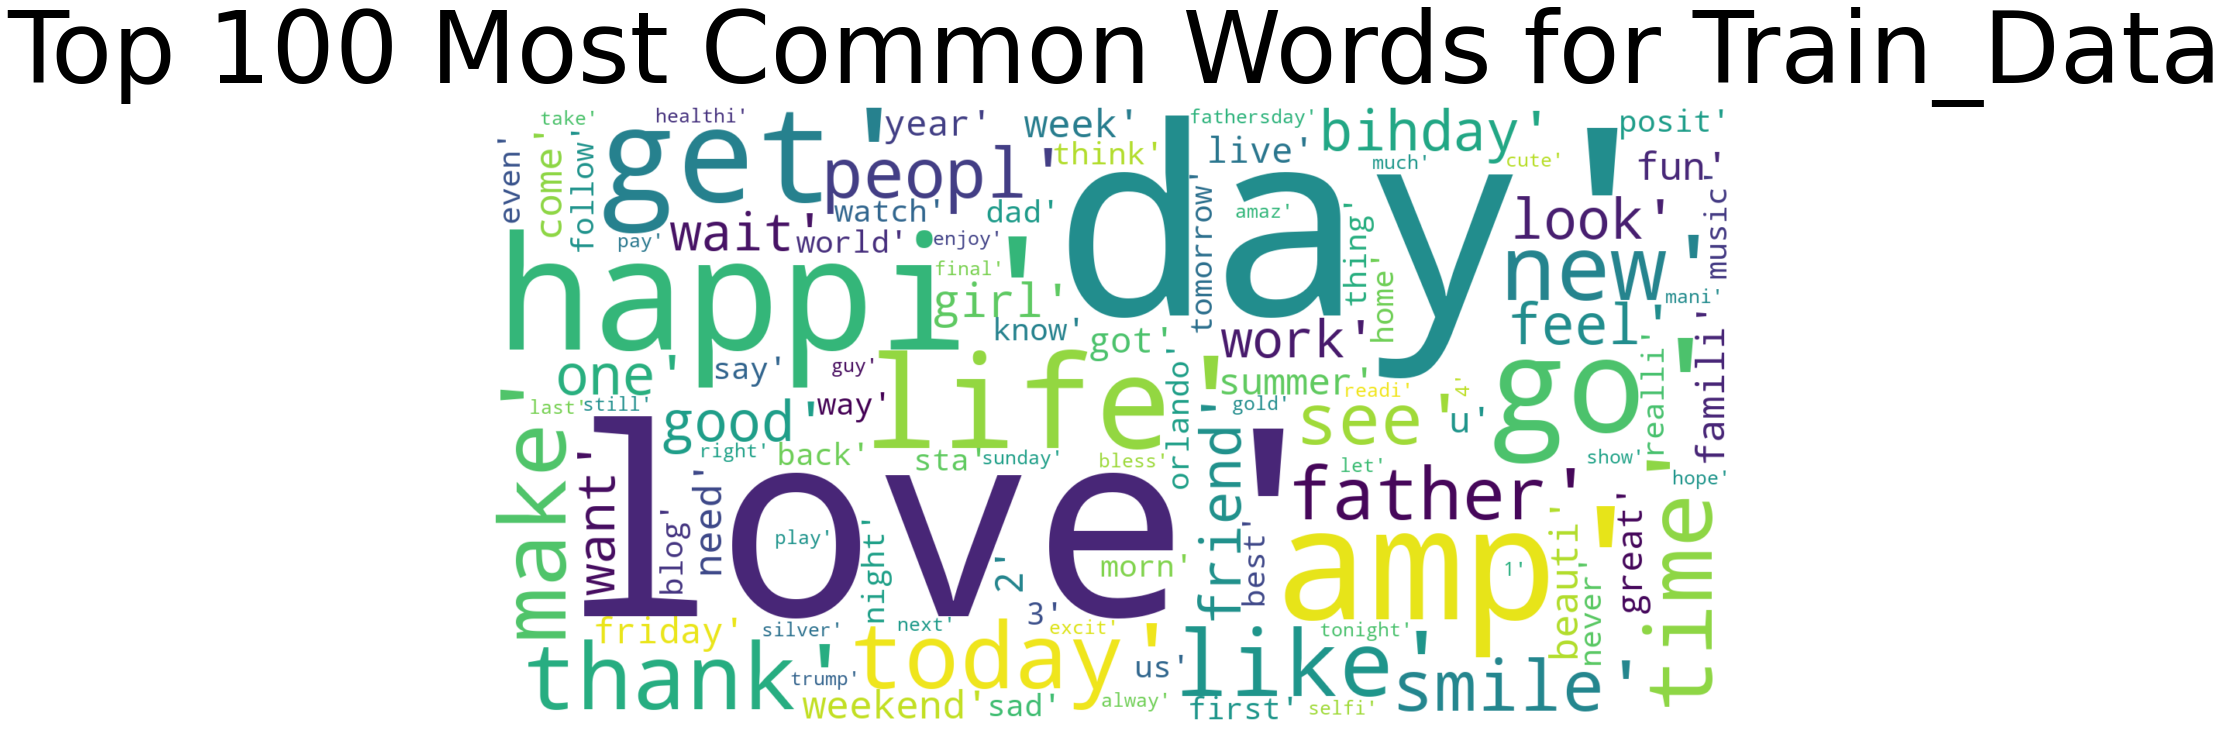

In [108]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
mostcommon = FreqDist(count_words_train).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words for Train_Data', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

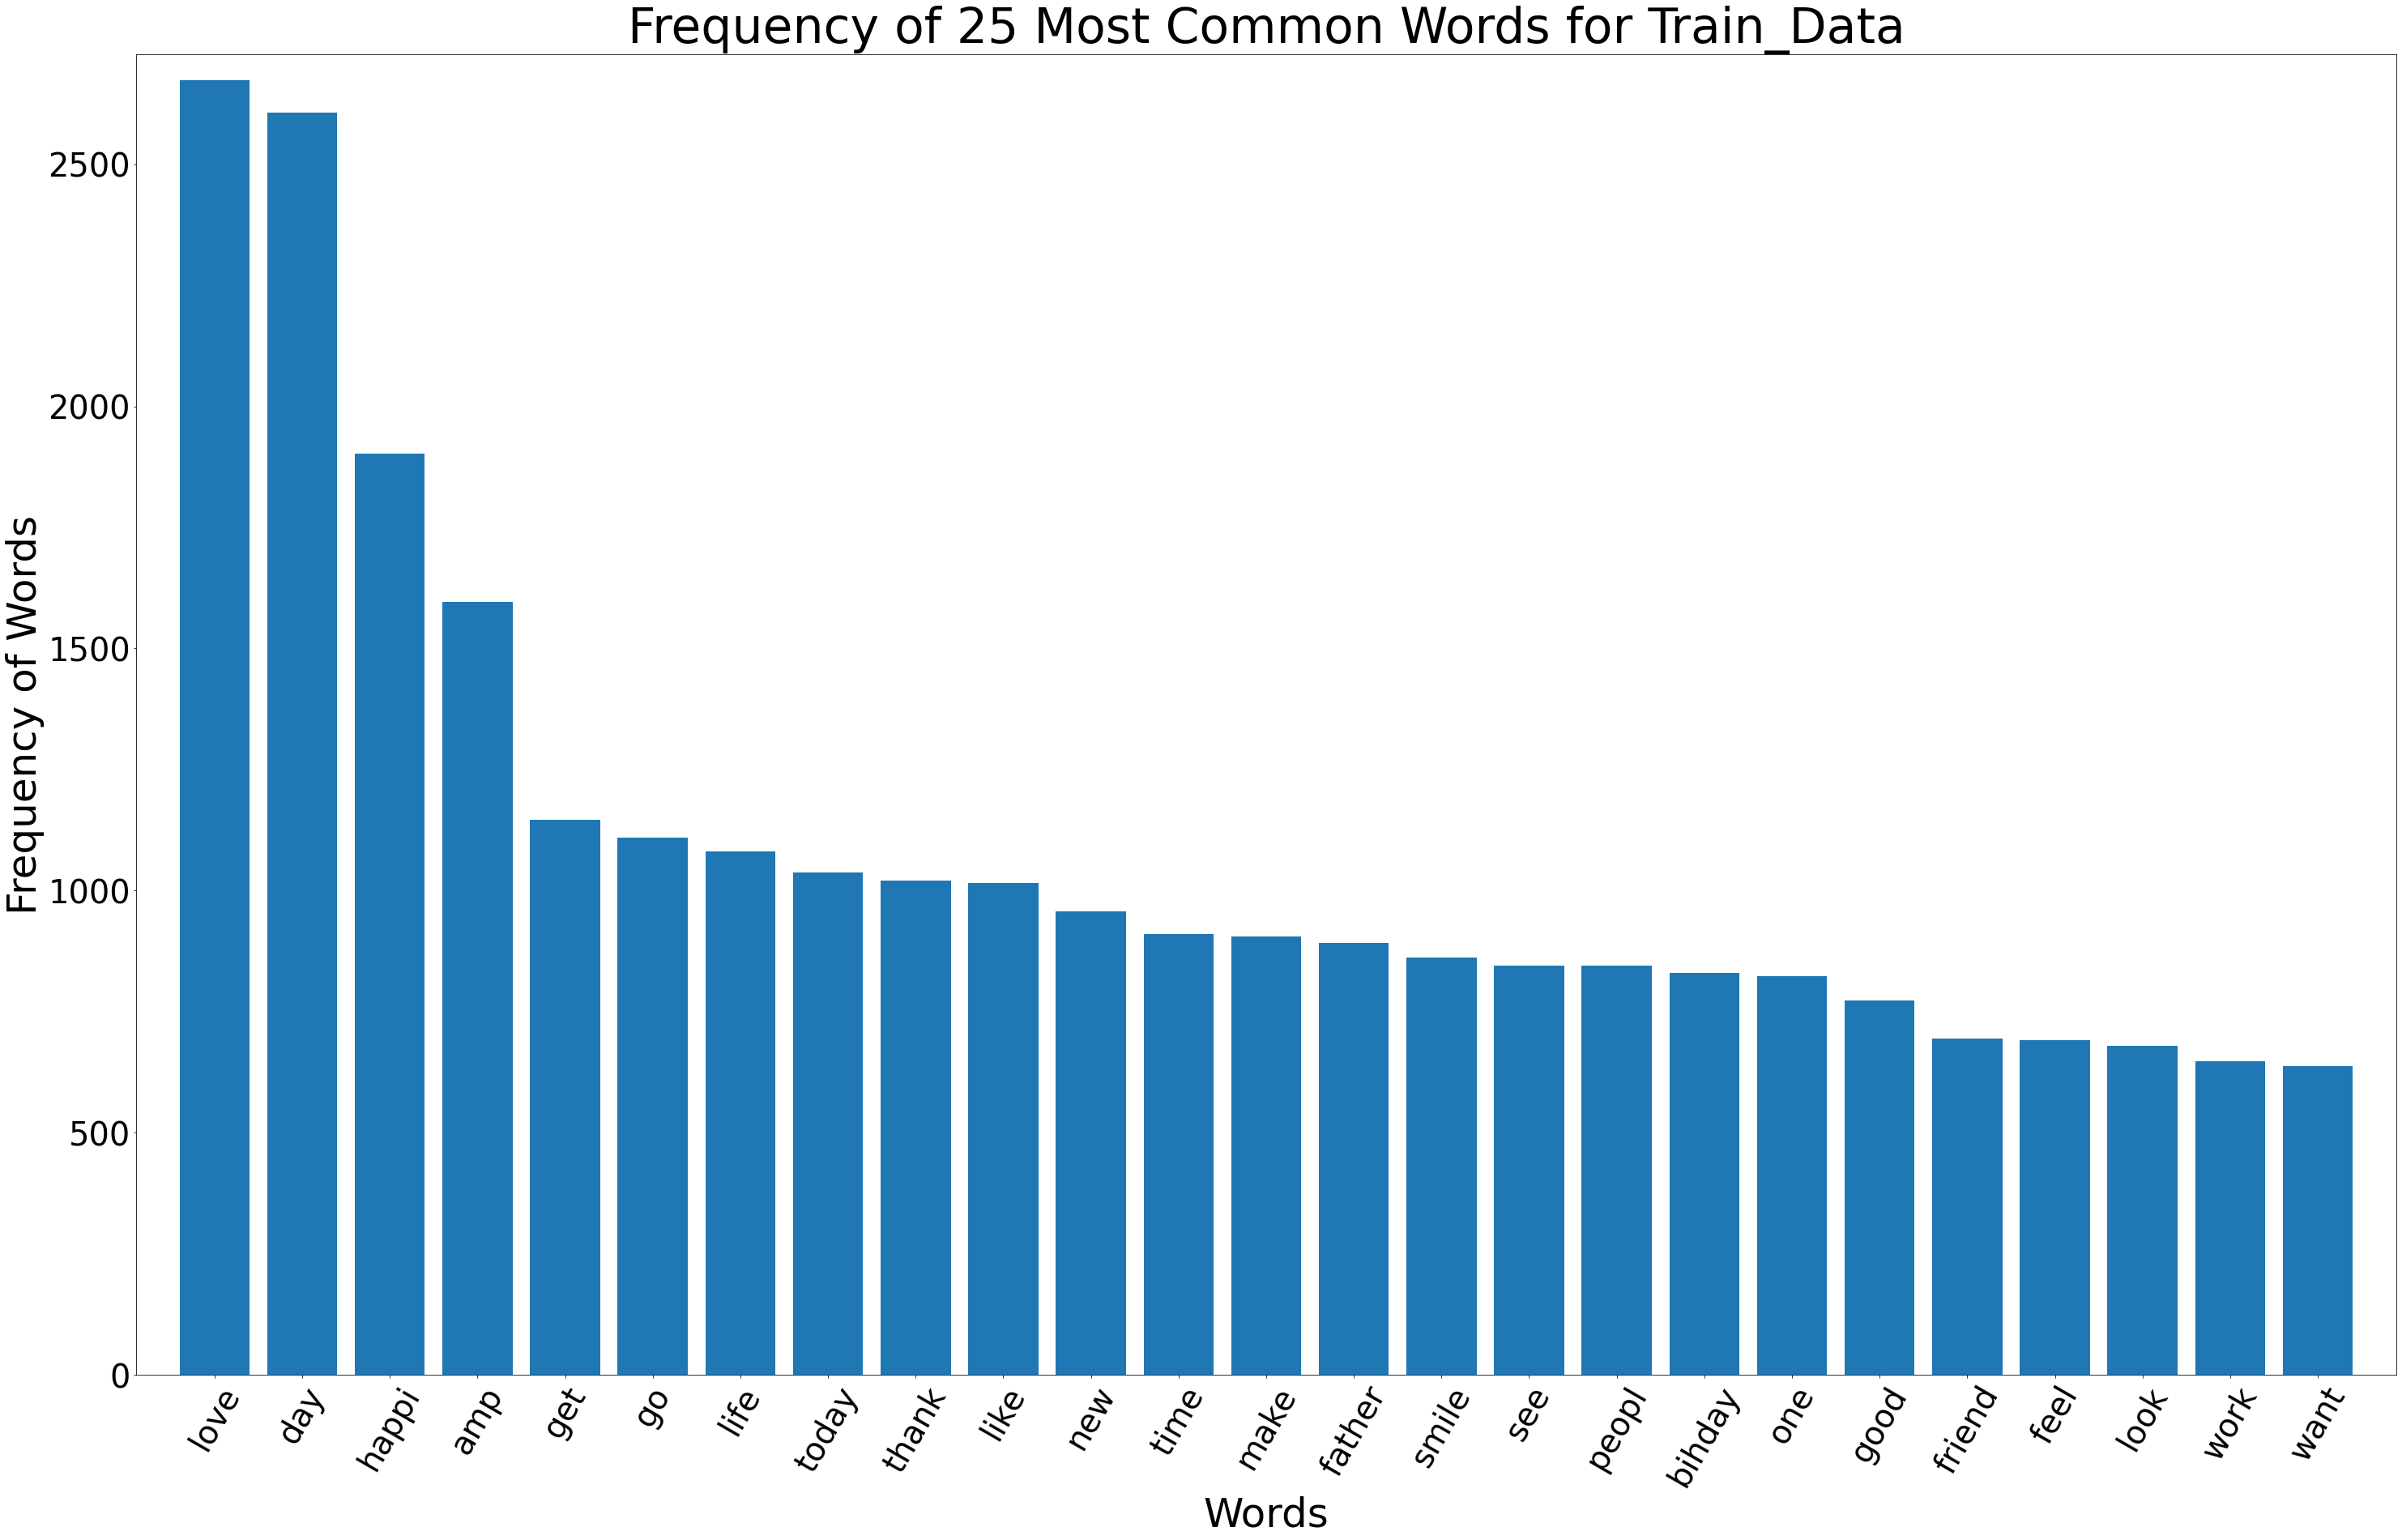

In [109]:
mostcommon_small = FreqDist(count_words_train).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Train_Data', fontsize=60)
plt.show()

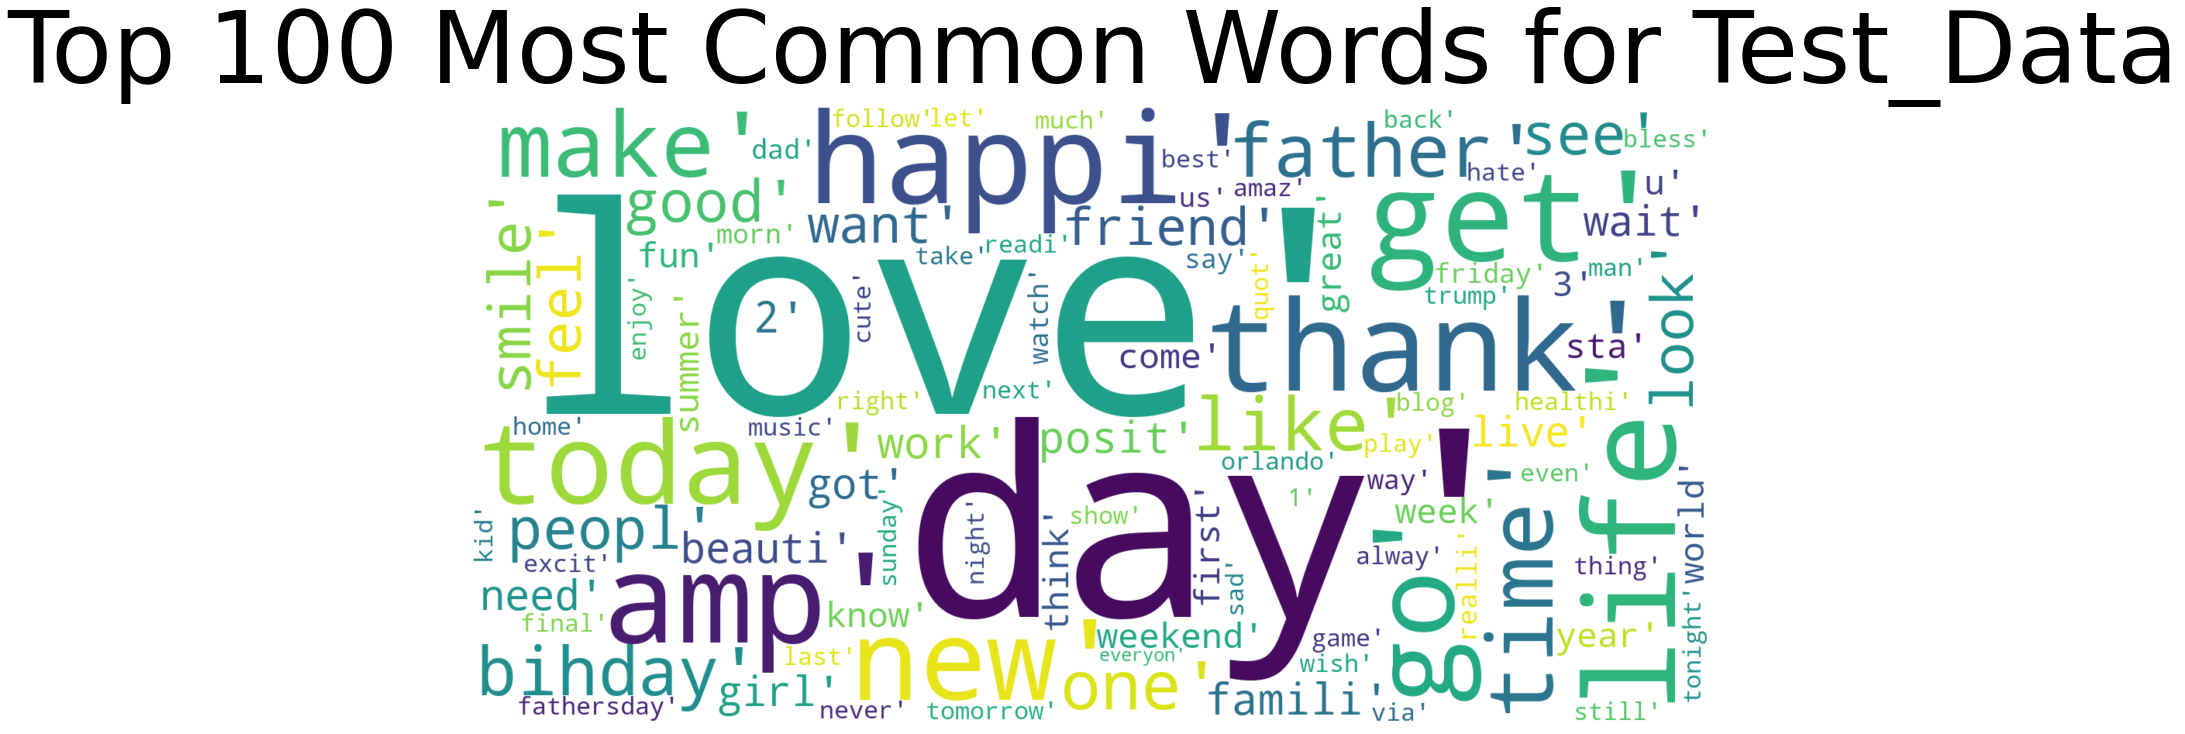

In [110]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
mostcommon = FreqDist(count_words_test).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words for Test_Data', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

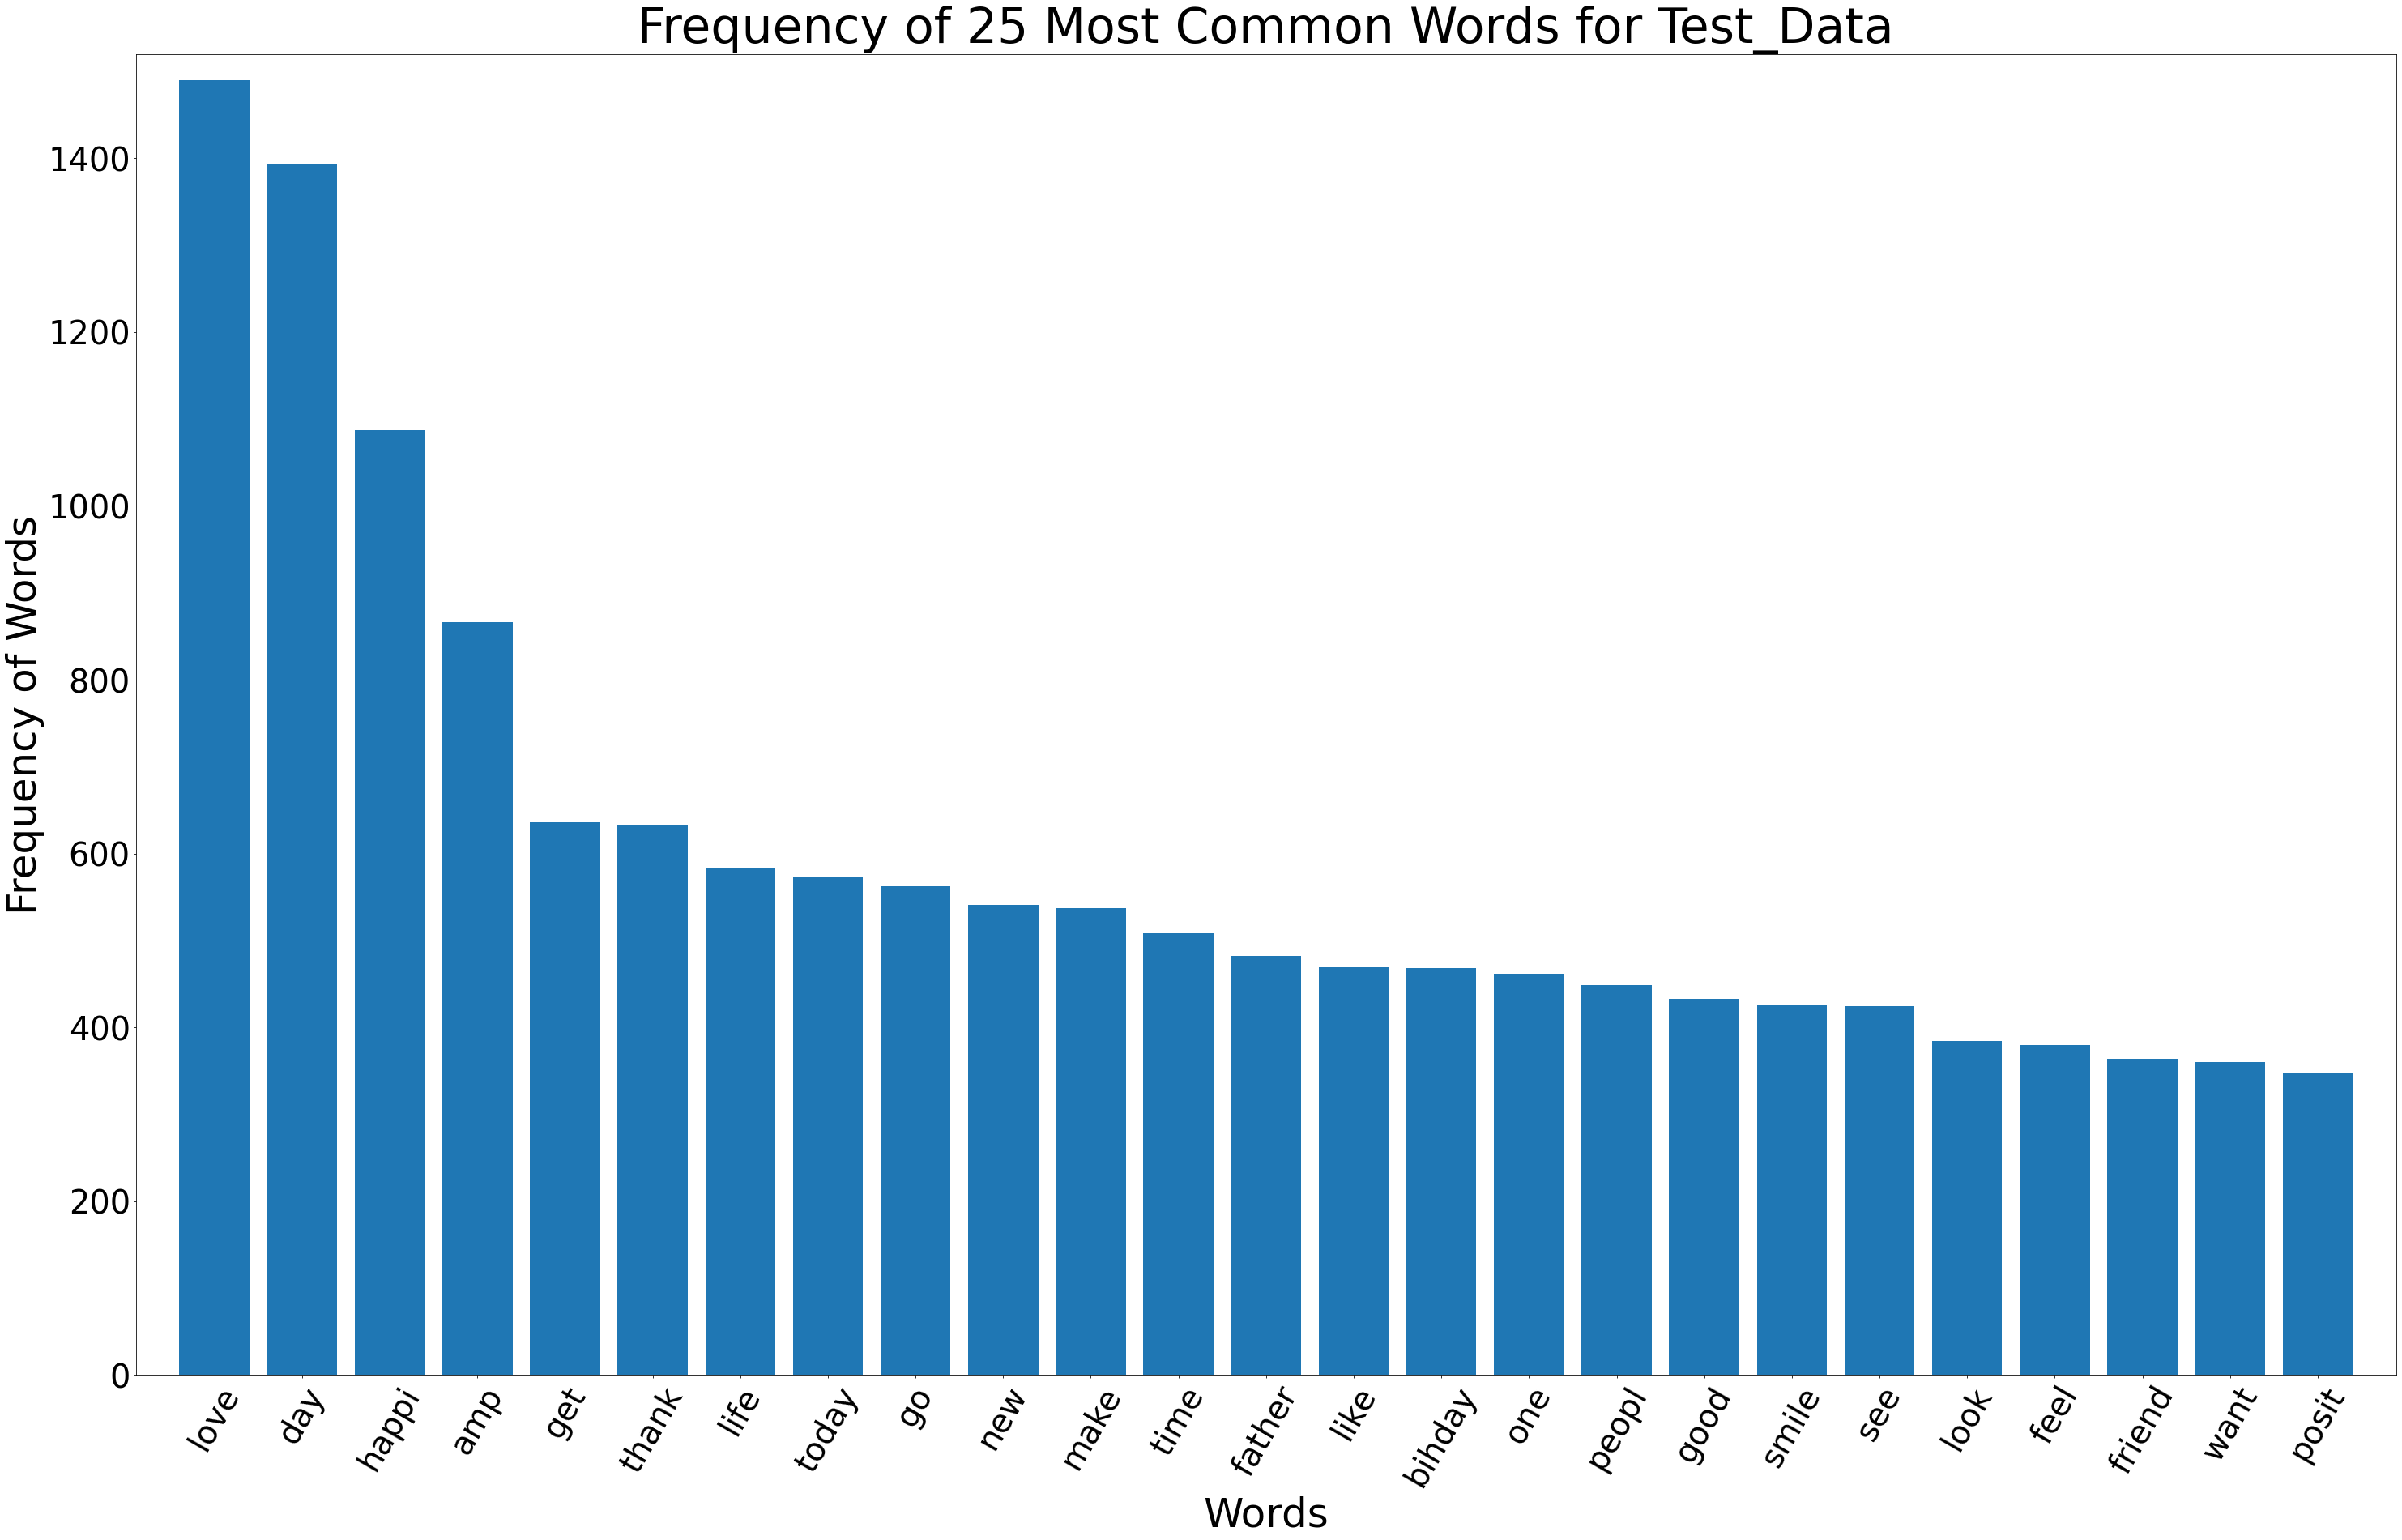

In [111]:
mostcommon_small = FreqDist(count_words_test).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Test_Data', fontsize=60)
plt.show()

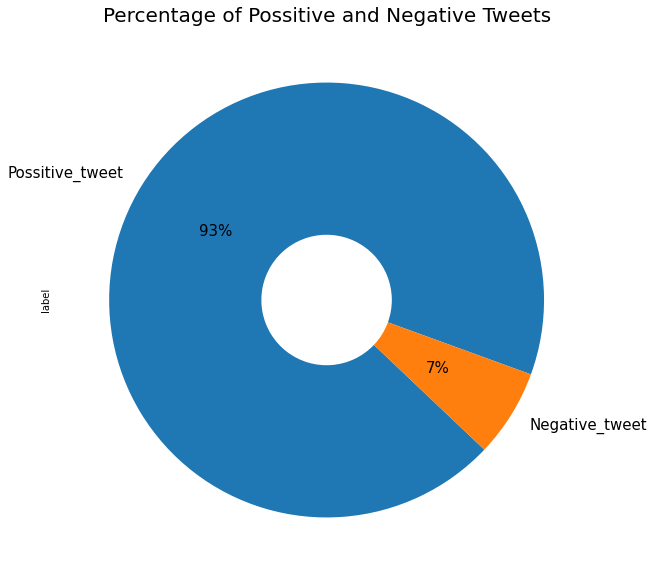

In [112]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Possitive and Negative Tweets', fontsize=20)
X_train.label.value_counts().plot(kind='pie', labels=['Possitive_tweet','Negative_tweet'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

***Featurization Techniques:***


**Bag of Word Model**

**TFIDF Technique for Feature Extraction**

In [113]:
from sklearn.utils import resample
train_major = X_train[X_train.label==0]
train_minor = X_train[X_train.label==1]
#Here we are upsampling the data
train_minor_upsampled = resample(train_minor,replace=True,n_samples=len(train_major),random_state=123)
train_upsampled = pd.concat([train_minor_upsampled, train_major])
#The upsampled data
train_upsampled['label'].value_counts()

1    26417
0    26417
Name: label, dtype: int64

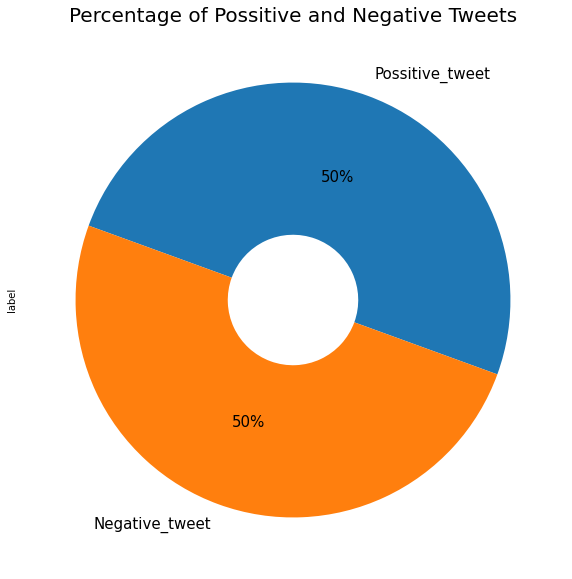

In [114]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Possitive and Negative Tweets', fontsize=20)
train_upsampled.label.value_counts().plot(kind='pie', labels=['Possitive_tweet','Negative_tweet'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
model = Pipeline([('vect', CountVectorizer()),('tvidf', TfidfTransformer()),('lr', LogisticRegression()),])

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_upsampled['tweet'],train_upsampled['label'],random_state = 0)

In [117]:
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [118]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9671535552754503

In [124]:
y_predict_test_data = model.predict(X_test['tweet'])

In [120]:
# y_predict_test_data =  y_predict_test_data.tolist()

In [125]:
y_predict_test_data

array([0, 0, 0, ..., 0, 1, 0])

In [126]:
X_test

,id,tweet
0,31963,studiolif aislif requir passion dedic willpow ...
1,31964,white supremacist want everyon see new bird movi
2,31965,safe way heal acn altwaystoh healthi heal
3,31966,hp curs child book reserv alreadi ye harrypott...
4,31967,3rd bihday amaz hilari nephew eli ahmir uncl d...
...,...,...
17191,49154,2 damn tuff ruff muff techno citi ng005 web 19...
17192,49155,thought factori left right polaris trump usele...
17193,49156,feel like mermaid hairflip neverreadi formal w...
17194,49157,hillari campaign today ohio omg amp use word l...


In [127]:
X_test['predict'] = y_predict_test_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
X_test

,id,tweet,predict
0,31963,studiolif aislif requir passion dedic willpow ...,0
1,31964,white supremacist want everyon see new bird movi,0
2,31965,safe way heal acn altwaystoh healthi heal,0
3,31966,hp curs child book reserv alreadi ye harrypott...,0
4,31967,3rd bihday amaz hilari nephew eli ahmir uncl d...,0
...,...,...,...
17191,49154,2 damn tuff ruff muff techno citi ng005 web 19...,0
17192,49155,thought factori left right polaris trump usele...,1
17193,49156,feel like mermaid hairflip neverreadi formal w...,0
17194,49157,hillari campaign today ohio omg amp use word l...,1
